# Лабораторная работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды.

Выполнил студент гр. 1384 Степаненко Денис Владиславович.

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения

**Генеральная совокупность** — совокупность всех возможных наблюдений, относительно которых предполагается делать выводы при постановке гипотезы.

**Выборка** — часть генеральной совокупности, которая была охвачена сбором данных.

**Статистический ряд** - последовательность элементов выборки, расположенных в порядке из получения (наблюдения)

**Ранжированный ряд** - последовательность элементов выборки, расположенных в порядке возрастания их значений.

**Ранг** - номер элемента ранжированного ряда.

**Вариационный ряд** - получается из ранжированного ряда в результате объединения одинаковых элементов.

**Варианта** - элемент вариационного ряда.

**Интервальный ряд** - вариационный ряд, разделенный на интервалы.

**Формула Стерджеса**: $k=1+3.31 \cdot lnN$

**Ширина интервала h**: $h =\frac{x_{min}-x_{max}}{k}$

**Абсолютные интервальные частоты** - cоответствующие вариантам $x_i$ числа $n_i$.

**Относительные интервальные частоты** - вычисляются как отношение абсолютной частоты на объем выборки.

**Полигон частот** - это ломаная, вершинами которой являются точки с координатами, соответствующими парам значений (среднее значение интервала; частота интервала)

**Гистограмма частот** - называется расположенная в прямоугольной системе
координат геометрическая фигура, состоящая из прямоугольников, основаниями
которых являются откладываемые по оси $Ох$ интервалы $[х_{i-1}; x_i)$
шириной $\Delta  x$, а соответствующими им высотами могут быть откладываемые по
оси $Оy$ (относительные) частоты.

**Эмпирическая функция распределения** - функция $F^*(x)$, определяющая для каждого значения $x$ относительную частоту события $X<x$

График $F^*(x)$ представляет собой лестнечный график, длина каждой стуеньки которого равна длине соответствующего интервала, а высота - отношению накопленной частоты до середины этого интервала к объему выборки:

$F^*(\tilde{x}_i)=\frac{m_i^{нак}}{N}$, где

$\sum_{j=1}^{i-1}m_j$, $i=1,2,...,k+1$ - **накоплленные частоты**

## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Пункт 1.

Лабораторная работа будет выполняться на языке программирования Python благодаря его простоте и возможности использовать различные мощные библиотеки для работы со статистическими данными. Напримеp: NumPy, Pandas, Matplotlib/seaborn, SciPy.

### Пункт 2.

Генеральная совокупность была выбрана из датасета для оценки ожирения людей на основе пищевых привычек и физического состояния: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition .

Для двумерной генеральной совокупности были выбраны 2 признака: вес и количество приемов пищи в день. Все переменные в выборке имеют вещественное значение.

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

!pip install ucimlrepo

In [116]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [117]:
new_data = X[['Weight', 'NCP']]
new_data

,Weight,NCP
0,64.000000,3.0
1,56.000000,3.0
2,77.000000,3.0
3,87.000000,3.0
4,89.800000,1.0
...,...,...
2106,131.408528,3.0
2107,133.742943,3.0
2108,133.689352,3.0
2109,133.346641,3.0


In [118]:
new_data.to_csv('output.csv', index=False)

### Пункт 3.

Свормируем из двумерной генеральной совокупности выборку объемом 95 случайным образом.

In [119]:
# df = new_data.sample(n=95, random_state=42)

# Используем заранее одобренную преподавателем выборку
df = pd.read_csv("/content/drive/MyDrive/Data/obesity_data.csv")
df

,Weight,NCP
0,53.699561,3.891994
1,111.004920,3.000000
2,60.000000,4.000000
3,42.000000,1.000000
4,74.000000,3.000000
...,...,...
90,80.000000,3.000000
91,102.784864,2.015675
92,51.588874,2.057935
93,75.000000,3.000000


### Пункт 4.



#### 4.1 Обработка первого столбца генеральной совокупности

In [120]:
df_weight = df['Weight'].to_numpy()
df_ncp = df['NCP'].to_numpy()

In [121]:
# Получение ранжированного ряда из ттаблицы pandas
ranked_row_weight = np.sort(df_weight)
print("Ранжированный ряд 1:", ranked_row_weight)

# Находим уникальные значения и их частоты
unique_values_weight, frequencies_weight = np.unique(ranked_row_weight, return_counts=True)
var_row_weight = np.column_stack((unique_values_weight, frequencies_weight))

print("Вариационный ряд:")
print(var_row_weight)

#Определяем границы интервалов
N = len(ranked_row_weight)
k_weight = round(1 + 3.322 * np.log(N))
print(f"k: {k_weight}")

h_weight = (ranked_row_weight[-1] - ranked_row_weight[0])/k_weight
print(f"h: {h_weight}")

intervals_weight = [(ranked_row_weight[0] + (i) * h_weight, ranked_row_weight[0] + (i+1) * h_weight) for i in range(k_weight)]
print("Интервальный ряд: ", np.round(intervals_weight,4))

midpoints_weight = [(interval[0] + interval[1]) / 2 for interval in intervals_weight]
print("Середины интервалов: ", np.round(midpoints_weight, 4))

interval_frequencies_weight = []
for interval in intervals_weight:
    count = 0
    for observation in ranked_row_weight:
        if interval[0] <= observation < interval[1]:
            count += 1
        elif interval[0] <= observation <= interval[1] and interval == intervals_weight[-1]:
            count += 1
    interval_frequencies_weight.append(count)

print("Абсолютные интервальные частоты:", interval_frequencies_weight)

relative_frequencies_weight = [frequency / N for frequency in interval_frequencies_weight]
print("Относительные интервальные частоты: ", np.round(relative_frequencies_weight, 4))

cumulative_abs_frequencies_weight = np.cumsum(interval_frequencies_weight)
print("Накопленные абсолютные частоты: ", cumulative_abs_frequencies_weight)

cumulative_rel_frequencies_weight = np.cumsum(relative_frequencies_weight)
print("Накопленные относительные частоты: ", np.round(cumulative_rel_frequencies_weight,4))


Ранжированный ряд 1: [ 42.        42.848033  44.        45.        48.        49.98297
  50.        50.        50.079991  50.248677  51.        51.588874
  53.        53.699561  54.567343  54.98774   55.        56.
  56.        58.        59.258372  59.933015  60.        60.
  60.        65.        66.        70.        70.        70.
  70.        71.        72.467862  72.748903  73.        73.193589
  74.        75.        75.        75.        77.        77.224574
  78.        78.        78.055968  78.997166  79.        79.58958
  80.        80.        80.311273  83.        83.        83.016968
  86.413388  88.        90.        91.059595  95.        97.449743
  97.959899  98.        99.540122 102.784864 103.0344   103.180918
 103.393354 103.841672 104.879602 106.452367 107.378702 108.012603
 108.019211 108.204547 110.640929 110.930509 111.00492  111.235188
 111.883747 111.95611  113.234349 114.480696 115.828167 116.160329
 117.651046 118.332689 118.382361 120.431551 121.236915 121.2

In [122]:
table_data_weight = {
"i": np.array(range(1, len(intervals_weight) +1)),
"[x_i, x_{i+1})": [f"[{interval[0]:.2f}, {interval[1]:.2f})" for interval in intervals_weight],
"~x_i": [f"{midpoint:.2f}" for midpoint in midpoints_weight],
"m_i": interval_frequencies_weight,
"~m_i": [f"{freq:.4f}" for freq in relative_frequencies_weight],
"m_нак_i": cumulative_abs_frequencies_weight,
"~m_нак_i": [f"{freq:.4f}" for freq in cumulative_rel_frequencies_weight]
}

# print(len(table_data["i"]))
# print(len(table_data["[x_i, x_{i+1})"]))
# print(len(table_data["~x_i"]))
# print(len(table_data["m_i"]))
# print(len(table_data["~m_i"]))
# print(len(table_data["m_нак_i"]))
# print(len(table_data["~m_нак_i"]))

# Добавляем строку с суммами
table_data_weight["i"] = np.append(table_data_weight["i"], "Σ")
table_data_weight["[x_i, x_{i+1})"].append("-")
table_data_weight["~x_i"].append("-")
table_data_weight["m_i"].append(np.sum(interval_frequencies_weight))
table_data_weight["~m_i"].append(f"{np.sum(relative_frequencies_weight):.4f}")
table_data_weight["m_нак_i"] = np.append(table_data_weight["m_нак_i"], "-")
table_data_weight["~m_нак_i"].append("-")

table_weight = pd.DataFrame(table_data_weight)
table_weight

,i,"[x_i, x_{i+1})",~x_i,m_i,~m_i,m_нак_i,~m_нак_i
0,1,"[42.00, 49.41)",45.71,5,0.0526,5,0.0526
1,2,"[49.41, 56.83)",53.12,14,0.1474,19,0.2000
2,3,"[56.83, 64.24)",60.54,6,0.0632,25,0.2632
3,4,"[64.24, 71.66)",67.95,7,0.0737,32,0.3368
4,5,"[71.66, 79.07)",75.37,15,0.1579,47,0.4947
5,6,"[79.07, 86.49)",82.78,8,0.0842,55,0.5789
6,7,"[86.49, 93.90)",90.20,3,0.0316,58,0.6105
7,8,"[93.90, 101.32)",97.61,5,0.0526,63,0.6632
8,9,"[101.32, 108.73)",105.03,11,0.1158,74,0.7789
9,10,"[108.73, 116.15)",112.44,9,0.0947,83,0.8737


#### Обработка второго столбца генеральной совокупности.

In [123]:
df_ncp = df['NCP'].to_numpy()

In [124]:
ranked_row_ncp = np.sort(df_ncp)
print("Ранжированный ряд 2:", ranked_row_ncp)

# Находим уникальные значения и их частоты
unique_values_ncp, frequencies_ncp = np.unique(ranked_row_ncp, return_counts=True)
var_row_ncp = np.column_stack((unique_values_ncp, frequencies_ncp))

print("Вариационный ряд:")
print(var_row_ncp)

#Определяем границы интервалов
N_ncp = len(ranked_row_ncp)
k_ncp = round(1 + 3.322 * np.log(N))
print(f"k: {k_ncp}")

h_ncp = (ranked_row_ncp[-1] - ranked_row_ncp[0])/k_ncp
print(f"h: {h_ncp}")

intervals_ncp = [(ranked_row_ncp[0] + (i) * h_ncp, ranked_row_ncp[0] + (i+1) * h_ncp) for i in range(k_ncp)]
print("Интервальный ряд: ", np.round(intervals_ncp,4))

midpoints_ncp = [(interval[0] + interval[1]) / 2 for interval in intervals_ncp]
print("Середины интервалов: ", np.round(midpoints_ncp, 4))

interval_frequencies_ncp = []
for interval in intervals_ncp:
    count = 0
    for observation in ranked_row_ncp:
        if interval[0] <= observation < interval[1]:
            count += 1
        elif interval[0] <= observation <= interval[1] and interval == intervals_ncp[-1]:
            count += 1
    interval_frequencies_ncp.append(count)

print("Абсолютные интервальные частоты:", interval_frequencies_ncp)

relative_frequencies_ncp = [frequency / N for frequency in interval_frequencies_ncp]
print("Относительные интервальные частоты: ", np.round(relative_frequencies_ncp, 4))

cumulative_abs_frequencies_ncp = np.cumsum(interval_frequencies_ncp)
print("Накопленные абсолютные частоты: ", cumulative_abs_frequencies_ncp)

cumulative_rel_frequencies_ncp = np.cumsum(relative_frequencies_ncp)
print("Накопленные относительные частоты: ", np.round(cumulative_rel_frequencies_ncp,4))

Ранжированный ряд 2: [1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.120102 1.240424 1.532833 1.706551
 2.015675 2.057935 2.175432 2.301129 2.37985  2.419656 2.478794 2.581015
 2.646717 2.7976   2.809716 2.89292  2.938902 2.976211 2.986172 3.
 3.       3.       3.       3.       3.       3.       3.       3.
 3.       3.       3.       3.       3.       3.       3.       3.
 3.       3.       3.       3.       3.       3.       3.       3.
 3.       3.       3.       3.       3.       3.       3.       3.
 3.       3.       3.       3.       3.       3.       3.       3.
 3.       3.       3.       3.       3.       3.       3.       3.
 3.       3.       3.       3.       3.       3.       3.014808 3.304123
 3.531038 3.647154 3.755976 3.891994 3.98525  4.       4.      ]
Вариационный ряд:
[[ 1.       12.      ]
 [ 1.120102  1.      ]
 [ 1.240424  1.      ]
 [ 1.532833  1.      ]
 [ 1.706551  1.      ]
 [ 2.015675  1.      ]
 [ 

In [125]:
table_data_ncp = {
    "i": np.array(range(1, len(intervals_ncp) +1)),
    "[x_i, x_{i+1})": [f"[{interval[0]:.2f}, {interval[1]:.2f})" for interval in intervals_ncp],
    "~x_i": [f"{midpoint:.2f}" for midpoint in midpoints_ncp],
    "m_i": interval_frequencies_ncp,
    "~m_i": [f"{freq:.4f}" for freq in relative_frequencies_ncp],
    "m_нак_i": cumulative_abs_frequencies_ncp,
    "~m_нак_i": [f"{freq:.4f}" for freq in cumulative_rel_frequencies_ncp]
}

# print(len(table_data["i"]))
# print(len(table_data["[x_i, x_{i+1})"]))
# print(len(table_data["~x_i"]))
# print(len(table_data["m_i"]))
# print(len(table_data["~m_i"]))
# print(len(table_data["m_нак_i"]))
# print(len(table_data["~m_нак_i"]))

# Добавляем строку с суммами
table_data_ncp["i"] = np.append(table_data_ncp["i"], "Σ")
table_data_ncp["[x_i, x_{i+1})"].append("-")
table_data_ncp["~x_i"].append("-")
table_data_ncp["m_i"].append(np.sum(interval_frequencies_ncp))
table_data_ncp["~m_i"].append(f"{np.sum(relative_frequencies_ncp):.4f}")
table_data_ncp["m_нак_i"] = np.append(table_data_ncp["m_нак_i"], "-")
table_data_ncp["~m_нак_i"].append("-")

table_ncp = pd.DataFrame(table_data_ncp)
table_ncp

,i,"[x_i, x_{i+1})",~x_i,m_i,~m_i,m_нак_i,~m_нак_i
0,1,"[1.00, 1.19)",1.09,13,0.1368,13,0.1368
1,2,"[1.19, 1.38)",1.28,1,0.0105,14,0.1474
2,3,"[1.38, 1.56)",1.47,1,0.0105,15,0.1579
3,4,"[1.56, 1.75)",1.66,1,0.0105,16,0.1684
4,5,"[1.75, 1.94)",1.84,0,0.0000,16,0.1684
5,6,"[1.94, 2.12)",2.03,2,0.0211,18,0.1895
6,7,"[2.12, 2.31)",2.22,2,0.0211,20,0.2105
7,8,"[2.31, 2.50)",2.41,3,0.0316,23,0.2421
8,9,"[2.50, 2.69)",2.59,2,0.0211,25,0.2632
9,10,"[2.69, 2.88)",2.78,2,0.0211,27,0.2842


Были проанализированны 2 выборки:
построены ранжированный, вариационный и интервальные ряды. Также были рассчитаны средние значения в каждом интервале.

В первом случае (вес участников иссеования) сосредоточен в средней части диапазона (около 70–100 кг), а крайние значения (меньше 50 кг и больше 100 кг) встречаются реже. В вариационном ряду наиболе часто втречающееся значение - 70кг, а большинство значений имеет имеет абсолютною частоту 1, что говорит о большой дисперсии. Для интервального ряда было высчитано: количество интервалов $k = 16$, а ширина интервала $h\approx 7.415 кг$. Наибольшая абсолютная чатота у интервала [71.6599,79.0748), что соответствует среднему диапазону веса; наименьшие - у трех последних интервалов. Относительныее частоты сообщают информацию о процентном модержании наблюдений в интервала примерно: 15% и 1% соответсвтвенно.

В втором случае (количество приемов пищи в день) значения сосредоточены около значения 3. По  этому в вариационном ряду наиболе часто втречающееся значение - 3 (55 раз), также выделяется значение 1 - 12 раз. Остальные значеня имеет имеет абсолютною частоту 1, что говорит тоже большой дисперсии. Для интервального ряда было высчитано: количество интервалов $k = 16$, а ширина интервала $h\approx 0.1875 кг$. Наибольшая абсолютная чатота у интервала [3.0625,3.25), в остальные интервалах значения распределены неравномерно (есть 2 нулевых интервала). Это может быть связанно с особенностями случайной небольшой выборки. Относительныее частоты сообщают информацию о процентном модержании наблюдений в интевалах. Наибольшие это примерно 14% и 63% в первом и 11 интерваах соответсвенно.

### Пункт 5.


<ipython-input-126-00619654ab39>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


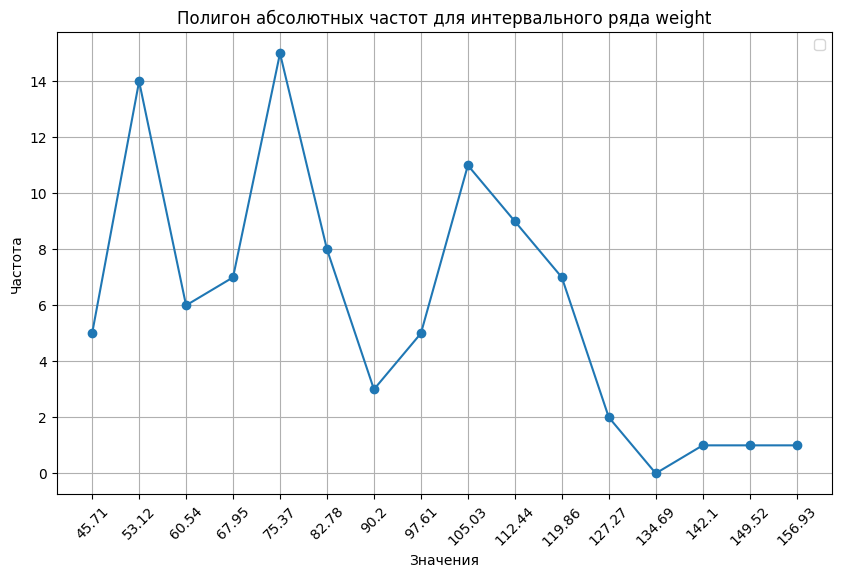

In [126]:
# Построение полигона
plt.figure(figsize=(10, 6))
plt.plot(midpoints_weight, interval_frequencies_weight[:16], marker='o')
plt.xticks(midpoints_weight, np.round(midpoints_weight,2), rotation=45)
plt.title('Полигон абсолютных частот для интервального ряда weight')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

<ipython-input-127-b743b8c79f9e>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


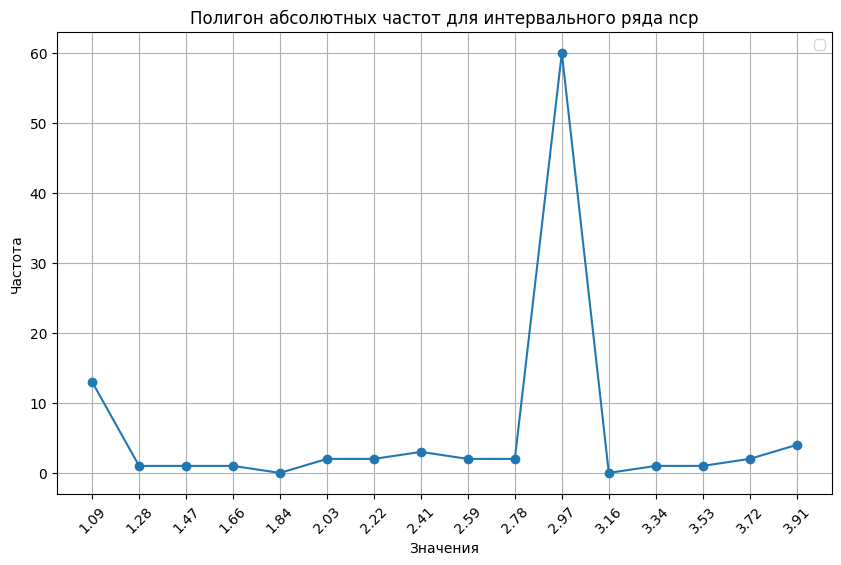

In [127]:
# Построение полигона
plt.figure(figsize=(10, 6))
plt.plot(midpoints_ncp, interval_frequencies_ncp[:16], marker='o')
plt.xticks(midpoints_ncp, np.round(midpoints_ncp,2), rotation=45)
plt.title('Полигон абсолютных частот для интервального ряда ncp')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

<ipython-input-128-79a388af31b8>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


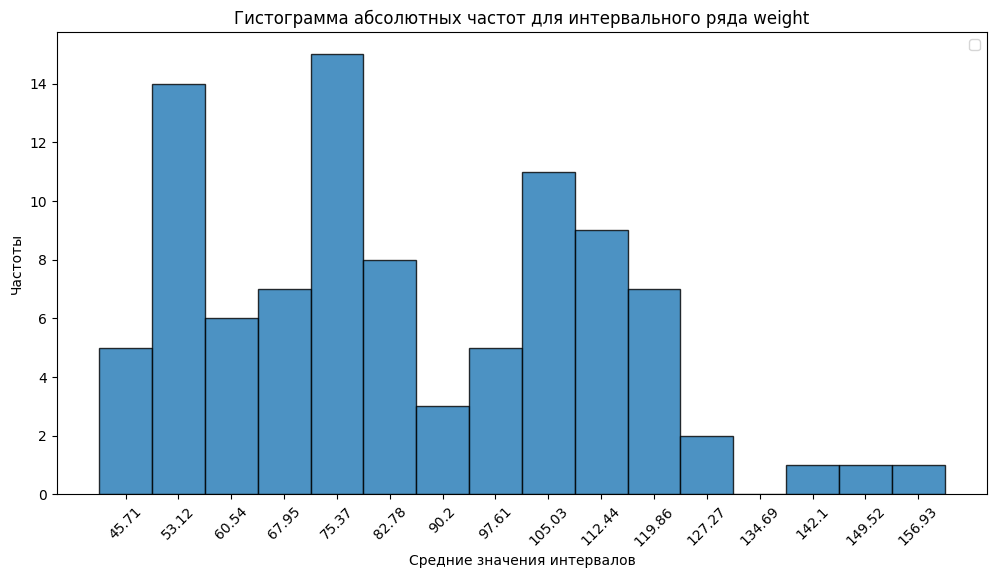

In [128]:
plt.figure(figsize=(12, 6))
plt.bar(midpoints_weight, interval_frequencies_weight[:16],  edgecolor='black', width = h_weight, alpha=0.8)
plt.xticks(midpoints_weight, np.round(midpoints_weight,2), rotation=45)
plt.title("Гистограмма абсолютных частот для интервального ряда weight")
plt.xlabel("Средние значения интервалов")
plt.ylabel("Частоты")
plt.legend()
plt.show()

<ipython-input-129-a4635a7c0495>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


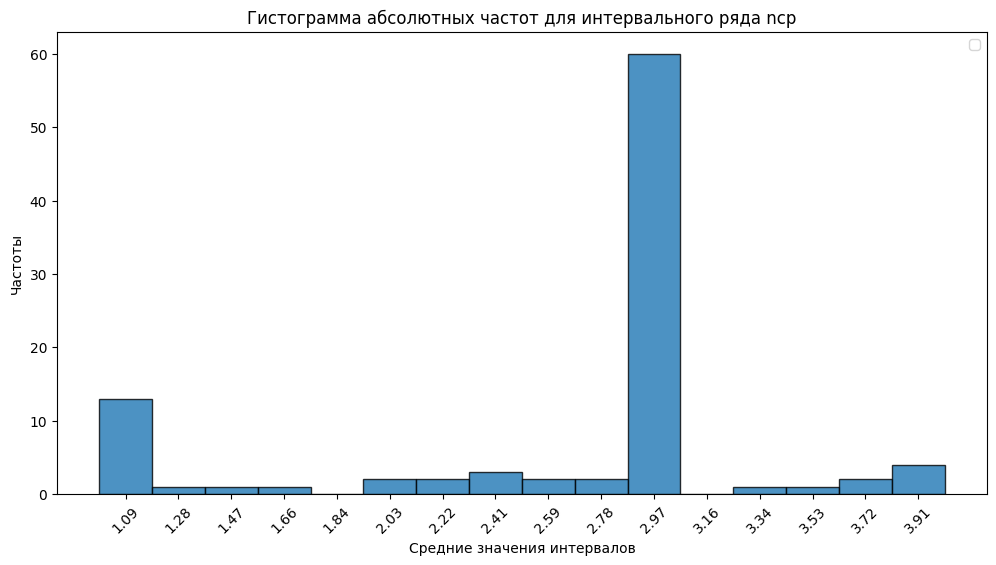

In [129]:
plt.figure(figsize=(12, 6))
plt.bar(midpoints_ncp, interval_frequencies_ncp[:16],  edgecolor='black', width = h_ncp, alpha=0.8)
plt.xticks(midpoints_ncp, np.round(midpoints_ncp,2), rotation=45)
plt.title("Гистограмма абсолютных частот для интервального ряда ncp")
plt.xlabel("Средние значения интервалов")
plt.ylabel("Частоты")
plt.legend()
plt.show()

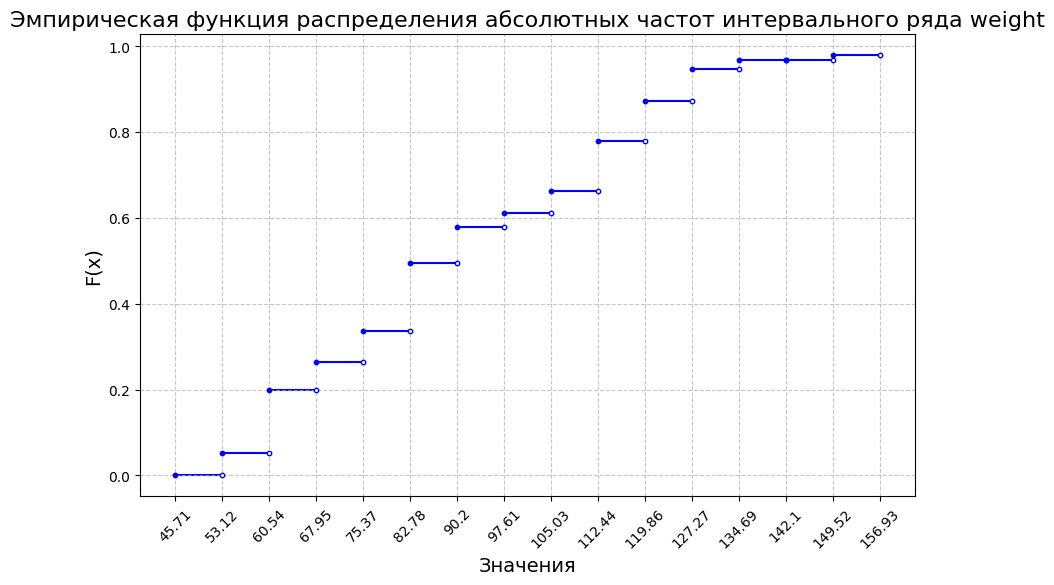

In [130]:
# Эмпирическая функция распределения
empirical_distribution_function_values = cumulative_abs_frequencies_weight / N
y = [0] + list(empirical_distribution_function_values)
x = midpoints_weight

plt.figure(figsize=(10, 6))
for i in range(len(x) - 1):
    # Точка в начале каждого шага
    plt.scatter(x[i], y[i],
                s=10, c="blue", linewidths=1, edgecolors='b', zorder=3)
    # Линии
    plt.hlines(y[i], x[i], x[i + 1], colors='b', zorder=1)
    # Пустая точка
    plt.scatter(x[i + 1], y[i],
                s=10, facecolors='white', linewidths=1, edgecolors='b', zorder=2)

plt.xticks(midpoints_weight, np.round(midpoints_weight,2), rotation=45)
# plt.yticks(y, np.round(y,2))
plt.title("Эмпирическая функция распределения абсолютных частот интервального ряда weight", fontsize=16)
plt.xlabel("Значения", fontsize=14)
plt.ylabel("F(x)", fontsize=14)
plt.grid(axis='both',  linestyle='--', alpha=0.7)


plt.show()

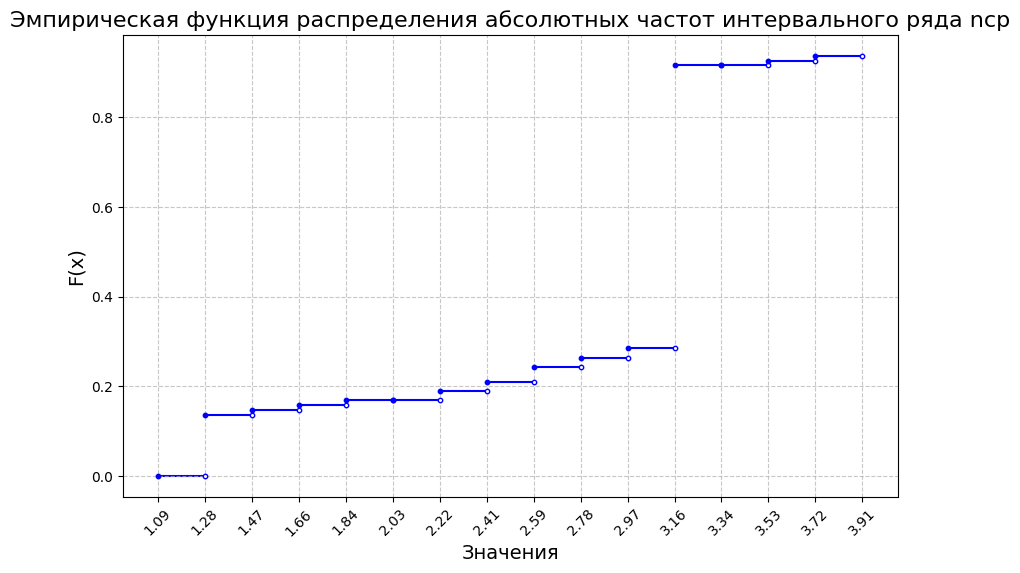

In [131]:
# Эмпирическая функция распределения
empirical_distribution_function_values_ncp = cumulative_abs_frequencies_ncp / N
y = [0] + list(empirical_distribution_function_values_ncp)
x = midpoints_ncp

plt.figure(figsize=(10, 6))
for i in range(len(x) - 1):
    # Точка в начале каждого шага
    plt.scatter(x[i], y[i],
                s=10, c="blue", linewidths=1, edgecolors='b', zorder=3)
    # Линии
    plt.hlines(y[i], x[i], x[i + 1], colors='b', zorder=1)
    # Пустая точка
    plt.scatter(x[i + 1], y[i],
                s=10, facecolors='white', linewidths=1, edgecolors='b', zorder=2)

plt.xticks(midpoints_ncp, np.round(midpoints_ncp,2), rotation=45)
# plt.yticks(y, np.round(y,2))
plt.title("Эмпирическая функция распределения абсолютных частот интервального ряда ncp", fontsize=16)
plt.xlabel("Значения", fontsize=14)
plt.ylabel("F(x)", fontsize=14)
plt.grid(axis='both',  linestyle='--', alpha=0.7)


plt.show()

Графики показывают, что распределения веса немного сдвинутое (имеет вид 2 колоколов, что может значит что это 2 нормальных распределений). Выборка "ncp" имеет очень резкий скачок возле значения 3 и 1. Это может значит что она имеет тоже 2 нормальных распределения в начале и в конце с небольшим значением параметра $\sigma$.


### Пункт 6.

<ipython-input-132-b8596a52019b>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


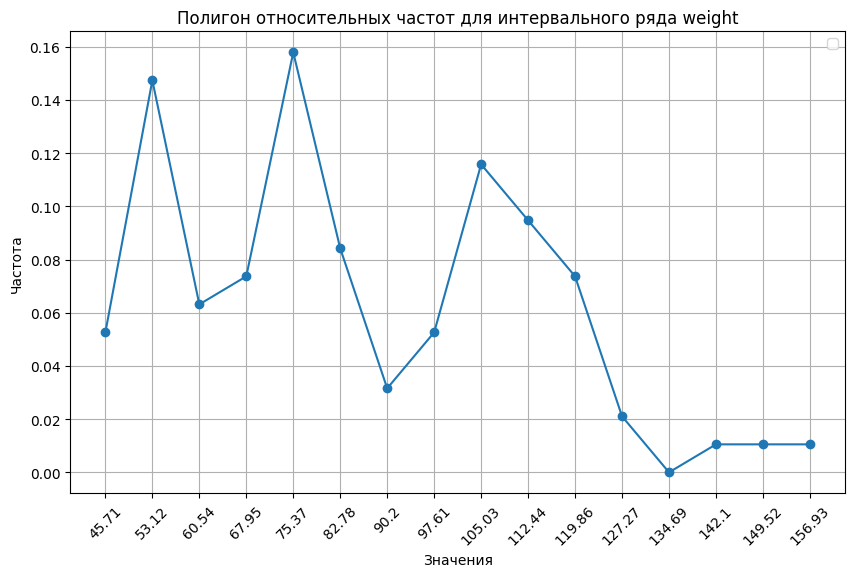

In [132]:
# Построение полигона
plt.figure(figsize=(10, 6))
plt.plot(midpoints_weight, relative_frequencies_weight[:16], marker='o')
plt.xticks(midpoints_weight, np.round(midpoints_weight,2), rotation=45)
plt.title('Полигон относительных частот для интервального ряда weight')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

<ipython-input-133-d86eabf06a4e>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


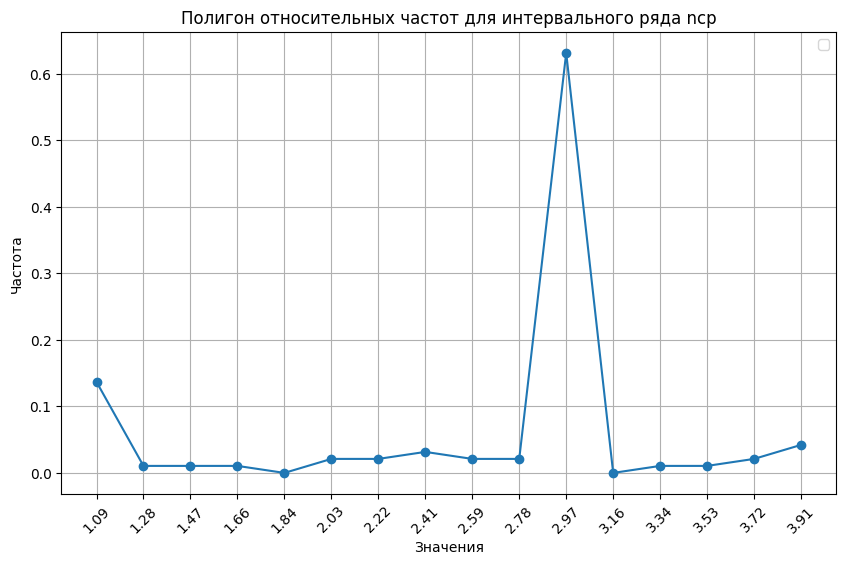

In [133]:
# Построение полигона
plt.figure(figsize=(10, 6))
plt.plot(midpoints_ncp, relative_frequencies_ncp[:16], marker='o')
plt.xticks(midpoints_ncp, np.round(midpoints_ncp,2), rotation=45)
plt.title('Полигон относительных частот для интервального ряда ncp')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

<ipython-input-134-e1cbdecd4b28>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


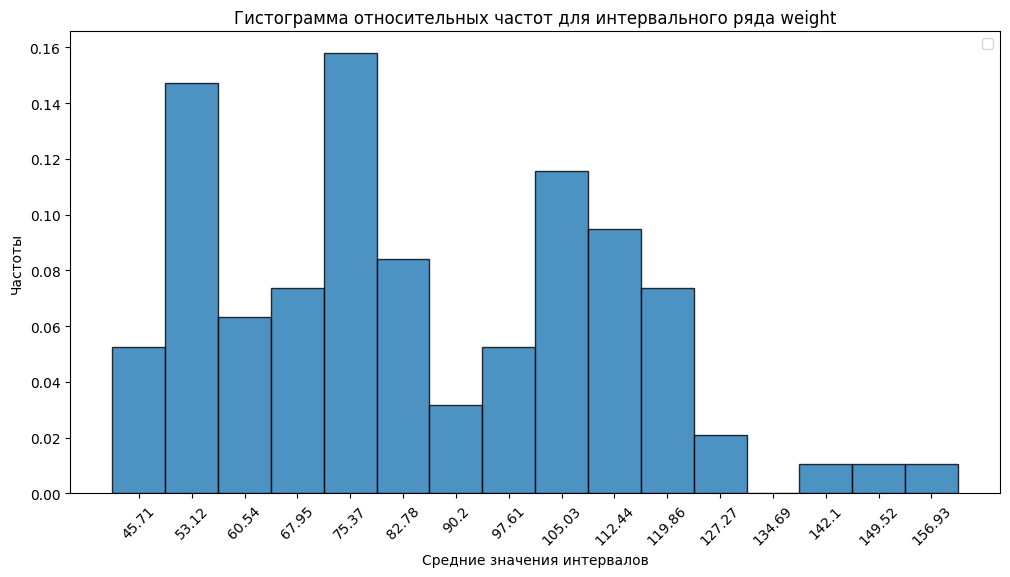

In [134]:
plt.figure(figsize=(12, 6))
plt.bar(midpoints_weight, relative_frequencies_weight[:16],  edgecolor='black', width = h_weight, alpha=0.8)
plt.xticks(midpoints_weight, np.round(midpoints_weight,2), rotation=45)
plt.title("Гистограмма относительных частот для интервального ряда weight")
plt.xlabel("Средние значения интервалов")
plt.ylabel("Частоты")
plt.legend()
plt.show()

<ipython-input-135-1626c3f95eb8>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


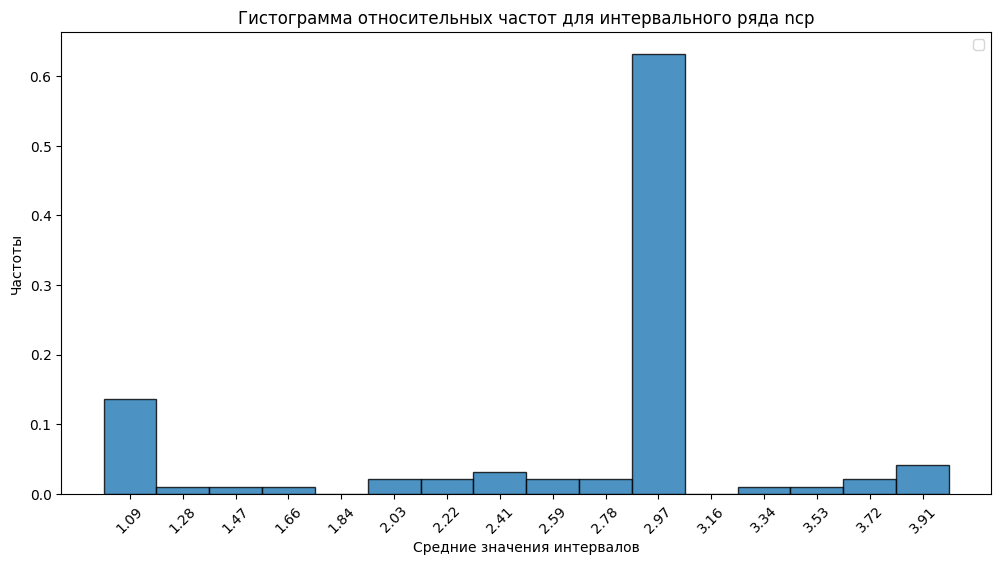

In [135]:
plt.figure(figsize=(12, 6))
plt.bar(midpoints_ncp, relative_frequencies_ncp[:16],  edgecolor='black', width = h_ncp, alpha=0.8)
plt.xticks(midpoints_ncp, np.round(midpoints_ncp,2), rotation=45)
plt.title("Гистограмма относительных частот для интервального ряда ncp")
plt.xlabel("Средние значения интервалов")
plt.ylabel("Частоты")
plt.legend()
plt.show()

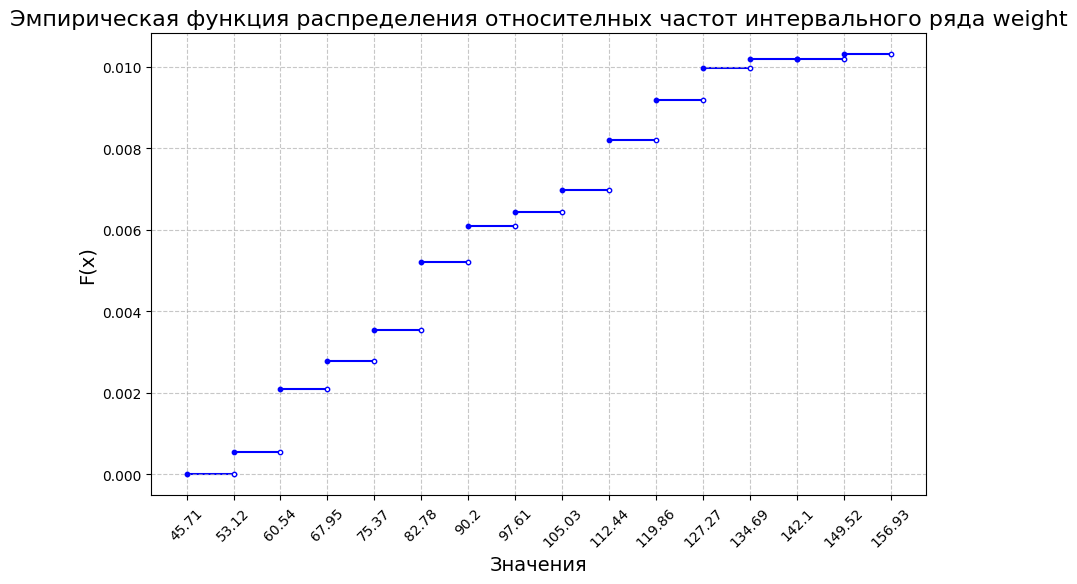

In [136]:
# Эмпирическая функция распределения
empirical_distribution_function_values = cumulative_rel_frequencies_weight / N
y = [0] + list(empirical_distribution_function_values)
x = midpoints_weight

plt.figure(figsize=(10, 6))
for i in range(len(x) - 1):
    # Точка в начале каждого шага
    plt.scatter(x[i], y[i],
                s=10, c="blue", linewidths=1, edgecolors='b', zorder=3)
    # Линии
    plt.hlines(y[i], x[i], x[i + 1], colors='b', zorder=1)
    # Пустая точка
    plt.scatter(x[i + 1], y[i],
                s=10, facecolors='white', linewidths=1, edgecolors='b', zorder=2)

plt.xticks(midpoints_weight, np.round(midpoints_weight,2), rotation=45)
# plt.yticks(y, np.round(y,2))
plt.title("Эмпирическая функция распределения относителных частот интервального ряда weight", fontsize=16)
plt.xlabel("Значения", fontsize=14)
plt.ylabel("F(x)", fontsize=14)
plt.grid(axis='both',  linestyle='--', alpha=0.7)


plt.show()

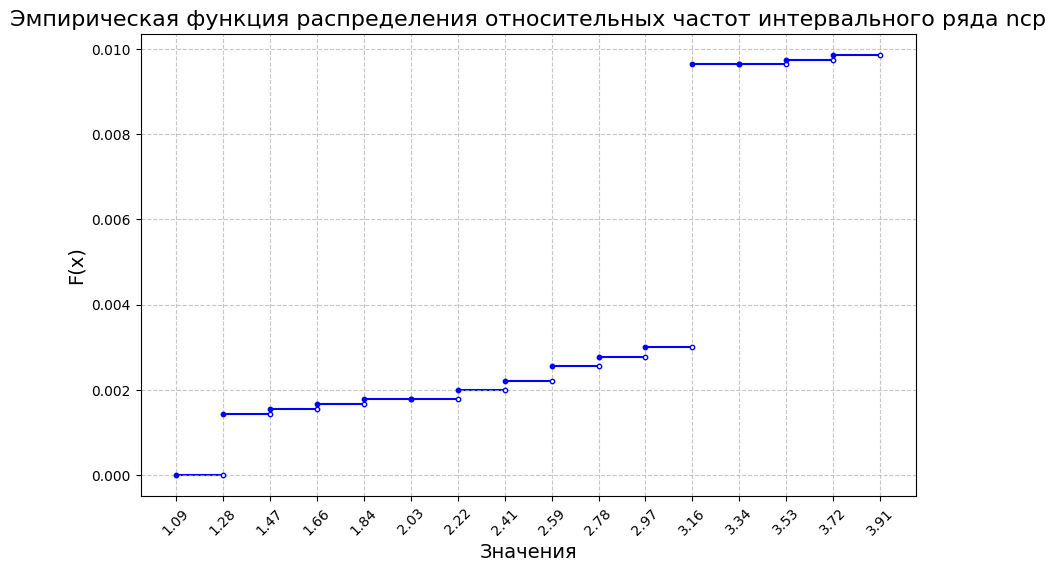

In [137]:
# Эмпирическая функция распределения
empirical_distribution_function_values_ncp = cumulative_rel_frequencies_ncp / N
y = [0] + list(empirical_distribution_function_values_ncp)
x = midpoints_ncp

plt.figure(figsize=(10, 6))
for i in range(len(x) - 1):
    # Точка в начале каждого шага
    plt.scatter(x[i], y[i],
                s=10, c="blue", linewidths=1, edgecolors='b', zorder=3)
    # Линии
    plt.hlines(y[i], x[i], x[i + 1], colors='b', zorder=1)
    # Пустая точка
    plt.scatter(x[i + 1], y[i],
                s=10, facecolors='white', linewidths=1, edgecolors='b', zorder=2)

plt.xticks(midpoints_ncp, np.round(midpoints_ncp,2), rotation=45)
# plt.yticks(y, np.round(y,2))
plt.title("Эмпирическая функция распределения относительных частот интервального ряда ncp", fontsize=16)
plt.xlabel("Значения", fontsize=14)
plt.ylabel("F(x)", fontsize=14)
plt.grid(axis='both',  linestyle='--', alpha=0.7)


plt.show()

Данные графики показывают относительные частоты. Однако из-за того, что они описывают одинковые выборки, дополнительной информации мы не получаем. Такие графики можно использовать при сравнении разных выборок - нормализация.
Графики, построенные для абсолютных и относительных частот, имеют одинаковый вид, поскольку они отражают одну и ту же структуру распределения данных.

## Выводы

В ходе выполнения лабораторной работы была сформированна репрезентативная выборка объемом 95 из датасета, содержащей данные о весе и количестве приемов пищи в день из генеральной совокупности исследования об ожирении людей.

Также была осуществлено последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Были упорядочены значения каждого признака (вес и количество приемов пищи) в порядке возрастания. Это позволило выявить минимальные, максимальные и характерные значения для обоих признаков. На основе ранжированных рядов были созданы вариационные ряды, где каждое уникальное значение сопоставлено с его частотой встречаемости. Это дало представление о распределении данных и наиболее распространенных значениях. Количество интервалов (k = 16) было рассчитано по формуле Стерджеса, а ширина интервалов (h) определена на основе диапазона значений.

Были отображены применительно к интервальному ряду графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Построенный полигон наглядно демонстрирует распределение абсолютных или относительных частот по интервалам. Он помогает оценить форму распределения данных. Гистограмма дает четкое представление о плотности распределения.
Эмпирическая функция показывает долю наблюдений, не превышающих определенного значения. Далее были сравнены результаты по относительным и аюсолютным частотам, что дало наиболее полное представление о выборках.
